#### Importacion de librerias

# Importante subir los archivos de train.csv y test.csv
# Tener paciencia, el algoritmo genético se toma su tiempo

In [6]:
!pip install geneticalgorithm

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from geneticalgorithm import geneticalgorithm as ga

In [8]:
# Funcion para obtener informacion basica sobre variables categoricas y numericas
def get_info(dataframe = pd.core.frame.DataFrame):
    print('These are the vairables in your DataFrame: \n----------------------------------------------------- \n')
    
    # Empty list for 'Numerical' and 'Categorical' variables
    numerical   = []
    categorical = []
    
    # Print variables, variable type, missing values, and unique values for Categorical variables
    for column in dataframe.columns:
        if dataframe[column].dtype in ['int64','float64']:
            numerical.append(str(column))
        else:
            categorical.append(str(column))
        
    print("Numerical variables in DataFrame: \n")
    [print("{} variable has {} missing values.".format(col,dataframe[col].isna().sum())) for col in numerical]
    print("\n")
    
    if len(categorical) > 0:
        print("Categorical variables in DataFrame: \n")
        [print("{} variable has {} unique values and {} missing values."
           .format(col,dataframe[col].nunique(),dataframe[col].isna().sum())) for col in categorical]
    else:
        print("There are no Categorical variables in DataFrame")

In [9]:
df_train = pd.read_csv('train.csv')
# Dataframe para utilizar etiquetas y observar la informacion
x_train_obs = df_train.copy()
# Dataframe que contiene el set de entrenamiento
x_train = df_train.copy()


x_test = pd.read_csv('test.csv')
x_test_copy = x_test.copy()

In [10]:
x_train_obs.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [11]:
get_info(x_train_obs)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

PassengerId variable has 0 missing values.
Survived variable has 0 missing values.
Pclass variable has 0 missing values.
Age variable has 177 missing values.
SibSp variable has 0 missing values.
Parch variable has 0 missing values.
Fare variable has 0 missing values.


Categorical variables in DataFrame: 

Name variable has 891 unique values and 0 missing values.
Sex variable has 2 unique values and 0 missing values.
Ticket variable has 681 unique values and 0 missing values.
Cabin variable has 147 unique values and 687 missing values.
Embarked variable has 3 unique values and 2 missing values.


In [12]:
x_train_obs.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
x_train_obs.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [14]:
# Variables numericas en el dataset

num_obs = x_train_obs.select_dtypes(exclude=['object'])
sns.set_theme(style="dark", palette="pastel")
graph_num = num_obs

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(graph_num, x="Age", hue='Survived', kde=True, color="green", ax=axs[0, 0])
sns.histplot(graph_num, x="SibSp", hue='Survived', kde=True, color="red", ax=axs[0, 1])
sns.histplot(graph_num, x="Parch", hue='Survived', kde=True, color="purple", ax=axs[1, 0])
sns.histplot(graph_num, x="Fare", hue='Survived', kde=True,color="olive", ax=axs[1, 1])

plt.show()

In [15]:
# Variables categoricas en el dataset
cat_obs = x_train_obs[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

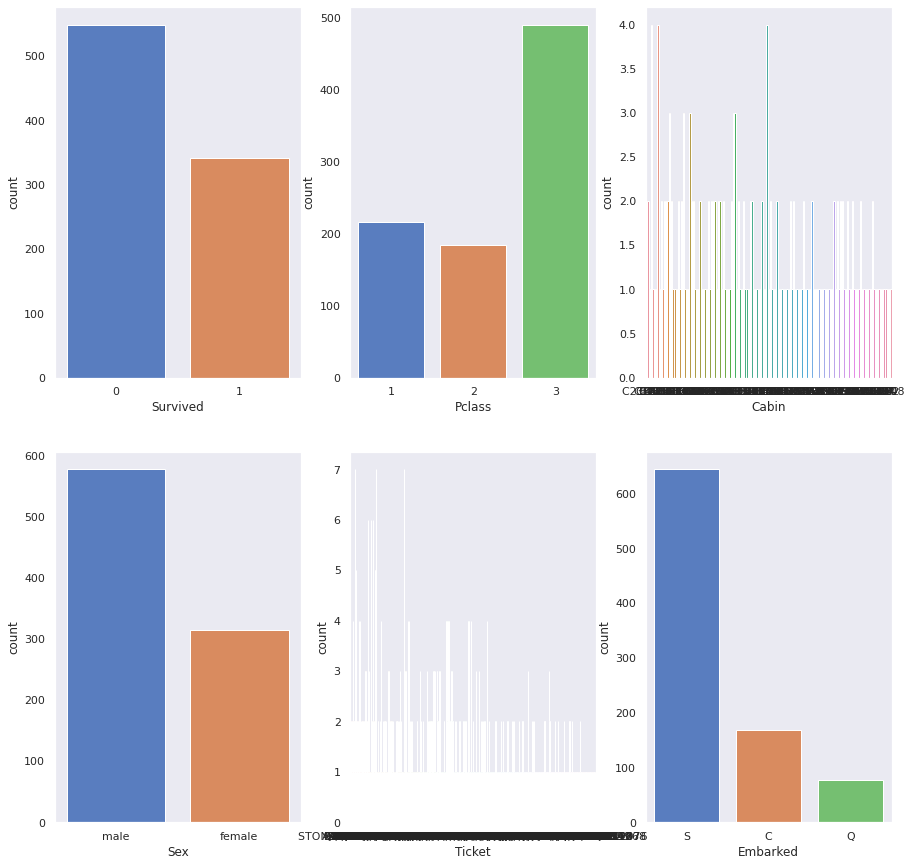

In [16]:
# Observacion de variables categoricas
sns.set_theme(style="dark", palette="muted")
graph_cat = cat_obs

fig, axs = plt.subplots(2, 3, figsize=(15, 15))

sns.countplot(x='Survived', data=graph_cat, ax=axs[0,0]) #x='Survived',data =y, ax=axs[0,0]
sns.countplot(x="Pclass", data=graph_cat,ax=axs[0, 1])
sns.countplot(x="Sex", data=graph_cat, ax=axs[1, 0])
sns.countplot(x="Ticket", data=graph_cat, ax=axs[1, 1])
sns.countplot(x="Cabin", data=graph_cat, ax=axs[0, 2])
sns.countplot(x="Embarked", data=graph_cat, ax=axs[1, 2])

plt.show()

#### Survived variable:

In [17]:
print("{} pasajeros sobrevivieorn y {} no".format(((x_train_obs['Survived']==1).sum()),((x_train_obs['Survived']==0).sum())))

342 pasajeros sobrevivieorn y 549 no


#### Age variable (edad) ingenieria de caracteristicas:

In [18]:
# Segun 'https://help.healthycities.org/hc/en-us/articles/219556208-How-are-the-different-age-groups-defined-':
# Infants are younger than 1 year
# Children are between 1 and 11 years
# Teens are between 12 and 17 years
# Adults are between 18 and 64 years
# Older adults are older than 65 years

def age_label(row):
    if row['Age']<1:
        return 'Infant'
    elif row['Age']>=1 and row['Age']<=11:
        return 'Children'
    elif row['Age']>=12 and row['Age']<=17:
        return 'Teen'
    elif row['Age']>=18 and row['Age']<=64:
        return 'Adult'
    elif row['Age']>=65:
        return 'Older Adult'
    else:
        return 'Unknown'

In [19]:
x_train_obs['Age_Class'] = x_train_obs.apply(lambda row: age_label(row), axis=1)

In [20]:
x_train_obs.groupby(['Age_Class']).sum()['Survived']

Age_Class
Adult          228
Children        32
Infant           7
Older Adult      1
Teen            22
Unknown         52
Name: Survived, dtype: int64

In [21]:
sns.barplot(x='Age_Class',y='Survived',data=x_train_obs)
plt.ylabel("Survival Probability")
plt.title("Survival between the different age groups")
plt.show()

In [22]:
# Combinando variables sobre numero de familiares abordo
def relative(row):
    return row['SibSp'] + row['Parch']

In [23]:
x_train_obs['Relatives'] = x_train_obs.apply(lambda row: relative(row), axis=1)
x_train['Relatives'] = x_train.apply(lambda row: relative(row), axis=1)
x_test['Relatives'] = x_test.apply(lambda row: relative(row), axis=1)

In [24]:
sns.barplot(x='Relatives', y='Survived', data=x_train_obs)
plt.ylabel("Survival Probability")
plt.title("Survival by number of relatives aboard")
plt.show()

In [25]:
x_train_obs['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [26]:
q1 = x_train_obs['Fare'].quantile(q=0.25)
q2 = x_train_obs['Fare'].quantile(q=0.50)
q3 = x_train_obs['Fare'].quantile(q=0.75)

In [27]:
# Pprobability de sobrevivir basado en lo que pagaorn pro el tiquete organizado en cuartiles

def fare_label(row):
    if row['Fare']<=q1:
        return '1 - 25%'
    elif (row['Fare']>q1) & (row['Fare']<=q2):
        return '25.1 - 50%'
    elif (row['Fare']>q2) & (row['Fare']<=q3):
        return '50.1 - 75%'
    else:
        return '75.1 - 100%'

In [28]:
x_train_obs['Fare_Label'] = x_train_obs.apply(lambda row: fare_label(row), axis=1)

In [29]:
x_train_obs.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_Class  Relatives  \
0      0         A/5 21171   7.2500   NaN        S     Adult          1   
1      0          PC 17599  71.2833   C85        C     Adult          1   
2      0  STON/O2. 3101282   7.9250   NaN        S     Adult          0   
3      0            113803  53.1000  C123        S     Adult          1   
4      0            373450   8.0500   NaN        S     Adult          0   

    Fare_Label  
0      1 - 25%  
1  75.1 - 100%  
2   25.1 - 50%  
3  75.1 - 100%  
4   25.1 - 50%

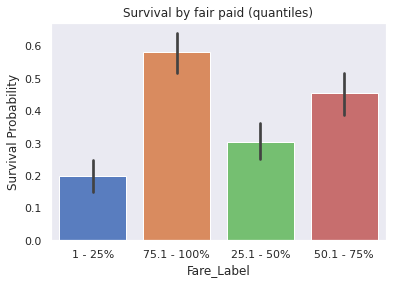

In [30]:
sns.barplot(x='Fare_Label', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival by fair paid (quantiles)')
plt.show()

In [31]:
sns.barplot(x='Pclass', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival by passenger class')
plt.show()

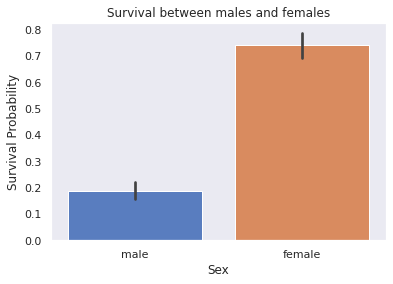

In [32]:
sns.barplot(x='Sex', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival between males and females')
plt.show()

In [33]:
# Total male and female passengers
survival_by_sex_total = x_train_obs['Sex'].value_counts()
# Total male and female passengers that survived
survival_by_sex = x_train_obs.groupby('Sex').sum()['Survived']
# Survival probability
survival_by_sex_percentage = (survival_by_sex/survival_by_sex_total)
survival_by_sex_percentage

female    0.742038
male      0.188908
dtype: float64

#### Embarked variable:

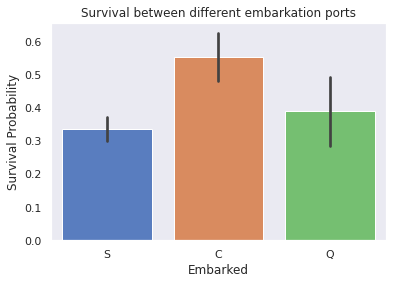

In [34]:
sns.barplot(x='Embarked', y='Survived', data=x_train_obs)
plt.ylabel('Survival Probability')
plt.title('Survival between different embarkation ports')
plt.show()

In [35]:
# Mr, Mrs, Miss, y Master son los mas frecuentes.
# Que otros honorificos hacen parte de los nombres?

for name in x_train_obs['Name'].values:
    if 'Mr.' in name:
        pass
    elif 'Mrs.' in name:
        pass
    elif 'Miss' in name:
        pass
    elif 'Master' in name:
        pass
    else:
        print(name)

Uruchurtu, Don. Manuel E
Byles, Rev. Thomas Roussel Davids
Bateman, Rev. Robert James
Minahan, Dr. William Edward
Carter, Rev. Ernest Courtenay
Moraweck, Dr. Ernest
Aubart, Mme. Leontine Pauline
Pain, Dr. Alfred
Reynaldo, Ms. Encarnacion
Peuchen, Major. Arthur Godfrey
Butt, Major. Archibald Willingham
Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")
Kirkland, Rev. Charles Leonard
Stahelin-Maeglin, Dr. Max
Sagesser, Mlle. Emma
Simonius-Blumer, Col. Oberst Alfons
Frauenthal, Dr. Henry William
Weir, Col. John
Mayne, Mlle. Berthe Antonine ("Mrs de Villiers")
Crosby, Capt. Edward Gifford
Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
Brewe, Dr. Arthur Jackson
Leader, Dr. Alice (Farnham)
Reuchlin, Jonkheer. John George
Harper, Rev. John
Montvila, Rev. Juozas


In [36]:
# Funcion para etiquetas basados en los nombres
def name_age(row):
    if 'Mr.' in row['Name']:
        return 'Adult'
    if 'Mrs.' in row['Name']:
        return 'Adult'
    if 'Don.' in row['Name']:
        return 'Adult'
    if 'Rev.' in row['Name']:
        return 'Adult'
    if 'Dr.' in row['Name']:
        return 'Adult'
    if 'Mme.' in row['Name']:
        return 'Adult'
    if 'Mlle.' in row['Name']:
        return 'Adult'
    if 'Ms.' in row['Name']:
        return 'Adult'
    if 'Lady.' in row['Name']:
        return 'Adult'
    if 'Sir.' in row['Name']:
        return 'Adult'
    if 'Major.' in row['Name']:
        return 'Adult'
    if 'Col.' in row['Name']:
        return 'Adult'
    if 'Capt.' in row['Name']:
        return 'Adult'
    if 'Countess.' in row['Name']:
        return 'Adult'
    if 'Jonkheer.' in row['Name']:
        return 'Adult'
    if 'Master.' in row['Name']:
        return 'Child'
    if 'Miss.' in row['Name']:
        return 'Other'
    else:
        return 'Other'

In [37]:
x_train_obs['Name_Label'] = x_train_obs.apply(lambda row: name_age(row), axis=1)
x_train['Name_Label'] = x_train.apply(lambda row: name_age(row), axis=1)
x_test['Name_Label'] = x_test.apply(lambda row: name_age(row), axis=1)

In [38]:
x_train_obs.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_Class  Relatives  \
0      0         A/5 21171   7.2500   NaN        S     Adult          1   
1      0          PC 17599  71.2833   C85        C     Adult          1   
2      0  STON/O2. 3101282   7.9250   NaN        S     Adult          0   
3      0            113803  53.1000  C123        S     Adult          1   
4      0            373450   8.0500   NaN        S     Adult          0   

    Fare_Label Name_Label  
0      1 - 25%      Adult  
1  75.1 - 100%      Adult  
2   25.1 - 50%      Other  
3  75.1 - 100%      Adult  
4   25.1 - 50%      Adult

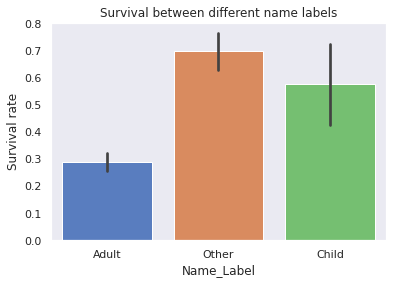

In [39]:
sns.barplot(x='Name_Label', y='Survived', data=x_train_obs)
plt.ylabel('Survival rate')
plt.title('Survival between different name labels')
plt.show()

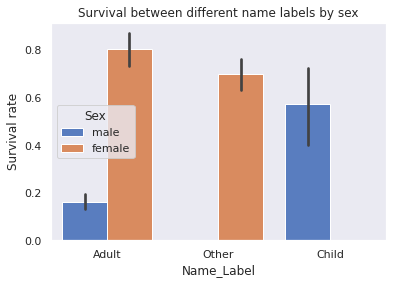

In [40]:
sns.barplot(x='Name_Label', y='Survived', data=x_train_obs, hue='Sex')
plt.ylabel('Survival rate')
plt.title('Survival between different name labels by sex')
plt.show()

In [41]:
x_train_obs.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_Class',
       'Relatives', 'Fare_Label', 'Name_Label'],
      dtype='object')

             Pclass       Age  Relatives      Fare
Pclass     1.000000 -0.369226   0.065997 -0.549500
Age       -0.369226  1.000000  -0.301914  0.096067
Relatives  0.065997 -0.301914   1.000000  0.217138
Fare      -0.549500  0.096067   0.217138  1.000000


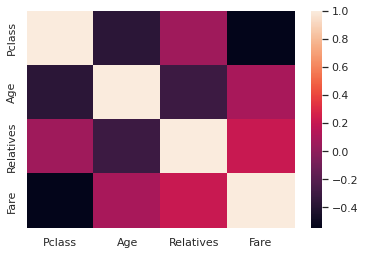

In [42]:
# Matriz de correlaciones
print(x_train_obs[['Pclass','Age','Relatives','Fare']].corr())
sns.heatmap(x_train_obs[['Pclass','Age','Relatives','Fare']].corr())

In [43]:
y_train = x_train[['Survived']]

In [44]:
y_train.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [45]:
x_train = x_train.drop(['Survived','PassengerId','SibSp','Parch','Name','Ticket','Cabin'],axis=1)
x_test = x_test.drop(['PassengerId','SibSp','Parch','Name','Ticket','Cabin'],axis=1)

In [46]:
get_info(x_test)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

Pclass variable has 0 missing values.
Age variable has 86 missing values.
Fare variable has 0 missing values.
Relatives variable has 0 missing values.


Categorical variables in DataFrame: 

Sex variable has 2 unique values and 0 missing values.
Embarked variable has 3 unique values and 0 missing values.
Name_Label variable has 3 unique values and 0 missing values.


#### x_test only needs to be encoded and have age NaNs replaced

In [47]:
# La mayoria de personas embarcaron en el puerto S, entonces los NaNs se remplazan por este
x_train['Embarked']=x_train['Embarked'].replace(np.nan, 'S', regex=True)

In [48]:
get_info(x_train)

These are the vairables in your DataFrame: 
----------------------------------------------------- 

Numerical variables in DataFrame: 

Pclass variable has 0 missing values.
Age variable has 177 missing values.
Fare variable has 0 missing values.
Relatives variable has 0 missing values.


Categorical variables in DataFrame: 

Sex variable has 2 unique values and 0 missing values.
Embarked variable has 3 unique values and 0 missing values.
Name_Label variable has 3 unique values and 0 missing values.


In [49]:
label_encoder = preprocessing.LabelEncoder()

cols_to_encode = ['Sex','Embarked','Name_Label']

for col in cols_to_encode:
    x_train[col]=label_encoder.fit_transform(x_train[col])
    x_test[col]=label_encoder.transform(x_test[col])
    print(label_encoder.classes_)

['female' 'male']
['C' 'Q' 'S']
['Adult' 'Child' 'Other']


In [50]:
x_train.head()

Pclass  Sex   Age     Fare  Embarked  Relatives  Name_Label
0       3    1  22.0   7.2500         2          1           0
1       1    0  38.0  71.2833         0          1           0
2       3    0  26.0   7.9250         2          0           2
3       1    0  35.0  53.1000         2          1           0
4       3    1  35.0   8.0500         2          0           0

In [51]:
x_test.head()

Pclass  Sex   Age     Fare  Embarked  Relatives  Name_Label
0       3    1  34.5   7.8292         1          0           0
1       3    0  47.0   7.0000         2          1           0
2       2    1  62.0   9.6875         1          0           0
3       3    1  27.0   8.6625         2          0           0
4       3    0  22.0  12.2875         2          2           0

In [52]:
# Utilizamos el iterative imputer
imputer = IterativeImputer(missing_values=np.nan, random_state=0)
x_train_final = pd.DataFrame(imputer.fit_transform(x_train))
x_train_final.columns = x_train.columns
x_train_final.head()

Pclass  Sex   Age     Fare  Embarked  Relatives  Name_Label
0     3.0  1.0  22.0   7.2500       2.0        1.0         0.0
1     1.0  0.0  38.0  71.2833       0.0        1.0         0.0
2     3.0  0.0  26.0   7.9250       2.0        0.0         2.0
3     1.0  0.0  35.0  53.1000       2.0        1.0         0.0
4     3.0  1.0  35.0   8.0500       2.0        0.0         0.0

In [53]:
x_test_final = pd.DataFrame(imputer.transform(x_test))
x_test_final.columns = x_test.columns
x_test_final.head()

Pclass  Sex   Age     Fare  Embarked  Relatives  Name_Label
0     3.0  1.0  34.5   7.8292       1.0        0.0         0.0
1     3.0  0.0  47.0   7.0000       2.0        1.0         0.0
2     2.0  1.0  62.0   9.6875       1.0        0.0         0.0
3     3.0  1.0  27.0   8.6625       2.0        0.0         0.0
4     3.0  0.0  22.0  12.2875       2.0        2.0         0.0

In [54]:
def to_positive(row):
    return abs(row['Age'])

In [55]:
x_train_final['Age'] = x_train_final.apply(lambda row: to_positive(row), axis=1)
x_test_final['Age'] = x_test_final.apply(lambda row: to_positive(row), axis=1)

## 4) Fase de modelacion
---

## Resultados de tecnicas con hiperparametros estandar

#### Logistic Regresison - Precision segun Kaggle: 76.32%

In [56]:
log_classifier = LogisticRegression(random_state = 0, max_iter=1000)
log_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_log_final = log_classifier.predict(x_test_final)

In [57]:
y_pred_log_final = pd.DataFrame((y_pred_log_final.reshape(-1,1)))

In [58]:
# Concatenating the passengers and predictions
log_results = pd.concat([x_test_copy[['PassengerId']],y_pred_log_final],axis=1)
log_results.head()

PassengerId  0
0          892  0
1          893  0
2          894  0
3          895  0
4          896  1

In [59]:
#log_results.to_csv('Multiple_Logistic_Regression.csv')

#### K-Nearest Neighbors - Precision segun Kaggle: 64.1%

In [60]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_knn_final = knn_classifier.predict(x_test_final)

In [61]:
y_pred_knn_final = pd.DataFrame((y_pred_knn_final.reshape(-1,1)))

In [62]:
knn_results = pd.concat([x_test_copy[['PassengerId']],y_pred_knn_final],axis=1)

In [63]:
#knn_results.to_csv('K-Nearest Neighbors.csv')

#### Support Vector Machine - Precision segun Kaggle: 76.6%

In [64]:
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_svm = svm_classifier.predict(x_test_final)

In [65]:
y_pred_svm = pd.DataFrame((y_pred_svm.reshape(-1,1)))

In [66]:
svm_results = pd.concat([x_test_copy[['PassengerId']],y_pred_svm],axis=1)

In [67]:
#svm_results.to_csv('Support_Vector_Machine.csv')

#### Kernel SVM - Precision segun Kaggle: 67%

In [68]:
ksvm_classifier = SVC(kernel = 'rbf', random_state = 0)
ksvm_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_ksvm = ksvm_classifier.predict(x_test_final)

In [69]:
y_pred_ksvm = pd.DataFrame((y_pred_ksvm.reshape(-1,1)))

In [70]:
ksvm_results = pd.concat([x_test_copy[['PassengerId']],y_pred_ksvm],axis=1)

In [71]:
#ksvm_results.to_csv('Kernel Support Vector Machine.csv')

#### Naive Bayes - Precision segun Kaggle: 75%

In [72]:
nb_classifier = GaussianNB()
nb_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_nb = nb_classifier.predict(x_test_final)

In [73]:
y_pred_nb = pd.DataFrame((y_pred_nb.reshape(-1,1)))

In [74]:
nb_results = pd.concat([x_test_copy[['PassengerId']],y_pred_nb],axis=1)

In [75]:
#nb_results.to_csv('Naive Bayes.csv')

#### Random Forest Classification - Precision segun Kaggle: 76%

In [76]:
rf_classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rf_classifier.fit(x_train_final,y_train.values.ravel())
y_pred_rf = rf_classifier.predict(x_test_final)

In [77]:
scores = cross_val_score(rf_classifier, x_train_final, y_train.values.ravel(), cv=5, n_jobs=-1)
scores.mean()

0.804758018956751

In [78]:
y_pred_rf = pd.DataFrame((y_pred_rf.reshape(-1,1)))

In [79]:
rf_results = pd.concat([x_test_copy[['PassengerId']],y_pred_rf],axis=1)

De los resultados de estas tecnicas cogemos Random Forest y adicionalmente boosting para optimizar algunos de los hiper parametros de estas

#### XGBOOST

In [80]:
from xgboost import XGBClassifier

In [81]:
model = XGBClassifier(n_estimators=500, random_state = 0)
scores = cross_val_score(model, x_train_final, y_train.values.ravel(), cv=5, n_jobs=-1)
scores.mean()

0.8350072186303434

In [82]:
model.fit(x_train_final,y_train.values.ravel())
y_pred_rf = model.predict(x_test_final)
y_pred_rf = pd.DataFrame((y_pred_rf.reshape(-1,1)))
rf_results = pd.concat([x_test_copy[['PassengerId']],y_pred_rf],axis=1)
#rf_results.to_csv("xgboost_sin_hiper.csv")

In [83]:
rf_results.head()

PassengerId  0
0          892  0
1          893  0
2          894  0
3          895  0
4          896  1

In [84]:
x_train_final.describe()

Pclass         Sex         Age        Fare    Embarked   Relatives  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     2.308642    0.647587   29.325701   32.204208    1.536476    0.904602   
std      0.836071    0.477990   13.654528   49.693429    0.791503    1.613459   
min      1.000000    0.000000    0.420000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000   21.000000    7.910400    1.000000    0.000000   
50%      3.000000    1.000000   28.599017   14.454200    2.000000    0.000000   
75%      3.000000    1.000000   36.750000   31.000000    2.000000    1.000000   
max      3.000000    1.000000   80.000000  512.329200    2.000000   10.000000   

       Name_Label  
count  891.000000  
mean     0.453423  
std      0.810616  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      2.000000

In [85]:
x_train_final.head()

Pclass  Sex   Age     Fare  Embarked  Relatives  Name_Label
0     3.0  1.0  22.0   7.2500       2.0        1.0         0.0
1     1.0  0.0  38.0  71.2833       0.0        1.0         0.0
2     3.0  0.0  26.0   7.9250       2.0        0.0         2.0
3     1.0  0.0  35.0  53.1000       2.0        1.0         0.0
4     3.0  1.0  35.0   8.0500       2.0        0.0         0.0

# En este momento se hace uso de Algoritmo Genetico

- n_estimators entre 50 y 1,000
- max_depth entre 1 y 20
- min_samples_split entre 1 y 200

# Random forest con algoritmo genetico

In [86]:
n_estimadores = (50, 200)
max_depth = (1,500)
min_samples_split = (2, 200)

In [87]:
varbound = np.array([n_estimadores,max_depth,min_samples_split])
vartype = np.array([['int'],['real'],['int']])
def f(x):
    model = RandomForestClassifier(n_estimators = int(x[0]),
                           criterion = 'entropy',
                           random_state = 0,
                           max_depth = int(x[1]),
                           min_samples_split = int(x[2]))
    scores = cross_val_score(model, x_train_final, y_train.values.ravel(), cv=5, n_jobs=-1)
    return -scores.mean()
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size': 10,\
                   'mutation_probability': 0.2,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv': 200}

model=ga(function=f, 
         dimension=3, 
         variable_type_mixed=vartype, 
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param
        )


 The best solution found:
 [110.         152.93584477  68.        ]

 Objective function:
 -0.8327474734793798


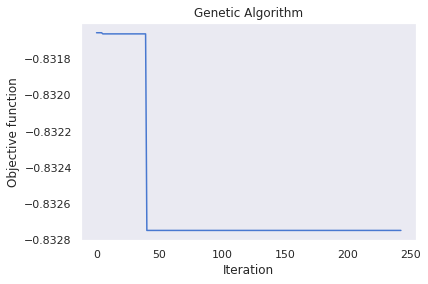

In [88]:
model.run()

# XGBOOST con algortimo genetico

In [89]:
n_estimadores = (50, 150)
max_depth = (1,500)
booster = {i:boost for i, boost in enumerate(("gbtree", "gblinear", "dart"))}
eta  = (0.1, 1)

In [90]:
varbound = np.array([n_estimadores, max_depth, [0,2], eta])
vartype = np.array([['int'],['int'], ['int'], ['real']])
def f(x):
    model = XGBClassifier(n_estimators=int(x[0]), max_depth = int(x[1]),
                          eta = x[2],
                          booster = booster[int(x[2])],
                          random_state = 0)
    scores = cross_val_score(model, x_train_final, y_train.values.ravel(), cv=5, n_jobs=-1)
    return -scores.mean()
algorithm_param = {'max_num_iteration': 1000,\
                   'population_size': 10,\
                   'mutation_probability': 0.2,\
                   'elit_ratio': 0.05,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv': 200}

model=ga(function=f, 
         dimension=4, 
         variable_type_mixed=vartype, 
         variable_boundaries=varbound,
         algorithm_parameters=algorithm_param
        )


 The best solution found:
 [74.          6.          0.          0.80678758]

 Objective function:
 -0.8372920720607621


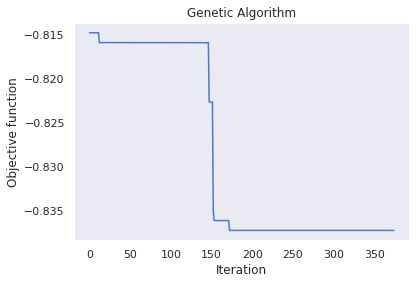

In [91]:
model.run()

In [92]:
# Volvemos a correr la tecnica pero con los hiperparametros indicados por el algoritmo genetico
# Luego este se envia a traves del buzon de kaggle para comparar su desemepeño real en el test set
model = XGBClassifier(n_estimators=65, max_depth = 263,
                          eta = 0.68898096,
                          booster = "gblinear",
                          random_state = 0)
model.fit(x_train_final,y_train.values.ravel())
y_pred_rf = model.predict(x_test_final)
y_pred_rf = pd.DataFrame((y_pred_rf.reshape(-1,1)))
rf_results = pd.concat([x_test_copy[['PassengerId']],y_pred_rf],axis=1)
#rf_results.to_csv("xgboost_con_hiper.csv")